### Predict the performance of staff in FAU Clinic and find the attribute that has the highest weight in training the model that predicts performace.

#### Import the neccessary libraries

For this finding, we are mainly going to need pandas and numpy libraries in Python 3.
So let's import them.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Import dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Nishaanthan/People_Analytics/refs/heads/main/datasets/clinic_performance.csv", sep = ',')

In [3]:
df.head()

,EmpNumber,Age,Gender,MaritalStatus,EmpJobRole,DistanceFromHomeKm,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E1001000,32,Male,Single,Critical care nurse,10,4,55,3,4,No,12,4,10,2,7,0,No,3
1,E1001006,47,Male,Single,Critical care nurse,14,4,42,3,1,No,12,4,20,3,7,1,No,3
2,E1001007,40,Male,Married,Critical care nurse,5,4,48,2,1,Yes,21,3,20,3,13,1,No,4
3,E1001009,41,Male,Divorced,Gerontological nurse,10,2,73,2,4,No,15,2,23,2,6,12,No,3
4,E1001010,60,Male,Single,Critical care nurse,16,1,84,3,1,No,14,4,10,3,2,2,No,3


#### Data cleaning

Now, let's check whether data is clean and doesn't contain any missing values or null values. We use "isnull" function which returns true if there some null values and false if there arent any.

In [4]:
df.isnull().values.any()

False

In our case, there are no missing data. However, if it would be the case, we would need to go deeper into the data cleaning process.

#### Dataset summary

Receive a summary of the columns in the dataset.

In [5]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'MaritalStatus', 'EmpJobRole',
       'DistanceFromHomeKm', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpJobInvolvement', 'EmpJobSatisfaction', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition',
       'PerformanceRating'],
      dtype='object')

Let's take a look at the first rows of the dataset to get some understanding of how it looks like.

In [6]:
df.head()

,EmpNumber,Age,Gender,MaritalStatus,EmpJobRole,DistanceFromHomeKm,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E1001000,32,Male,Single,Critical care nurse,10,4,55,3,4,No,12,4,10,2,7,0,No,3
1,E1001006,47,Male,Single,Critical care nurse,14,4,42,3,1,No,12,4,20,3,7,1,No,3
2,E1001007,40,Male,Married,Critical care nurse,5,4,48,2,1,Yes,21,3,20,3,13,1,No,4
3,E1001009,41,Male,Divorced,Gerontological nurse,10,2,73,2,4,No,15,2,23,2,6,12,No,3
4,E1001010,60,Male,Single,Critical care nurse,16,1,84,3,1,No,14,4,10,3,2,2,No,3


"describe" function helps us to receive a statistical summary of the dataset.

In [7]:
df.describe()

,Age,DistanceFromHomeKm,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,PerformanceRating
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,37.602848,9.594937,2.748418,66.079114,2.723101,2.737342,15.072785,2.655063,12.193038,2.764241,4.762658,2.520570,2.882911
std,8.916705,8.368334,1.095299,20.314954,0.710508,1.097756,3.560358,1.092260,7.616444,0.711989,3.552281,3.481837,0.553530
min,18.000000,1.000000,1.000000,30.000000,1.000000,1.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
25%,31.000000,2.000000,2.000000,48.000000,2.000000,2.000000,12.000000,2.000000,7.000000,2.000000,2.000000,0.000000,3.000000
50%,36.000000,7.000000,3.000000,67.000000,3.000000,3.000000,14.000000,3.000000,10.000000,3.000000,4.000000,1.000000,3.000000
75%,44.000000,15.000000,4.000000,83.250000,3.000000,4.000000,17.000000,4.000000,15.000000,3.000000,7.000000,4.000000,3.000000
max,60.000000,29.000000,4.000000,100.000000,4.000000,4.000000,25.000000,4.000000,38.000000,4.000000,17.000000,15.000000,4.000000


Graphical respresentation of the distribution of the data can also be helpful at this point. To give a few examples, we are going to plot the distribution of workload as well as performance with the help of seaborn library. Wee see that the majority of employees have the performance 5.


Employee Job Role Performance Analysis:
 EmpJobRole
Gerontological nurse         3.000000
Medical surgical nurse       3.000000
Nurse Anesthetist            3.000000
Occupational Health nurse    2.936170
Health Informatics           2.859375
Critical care nurse          2.855556
Healthcare Representative    2.848485
Practitioner nurse           2.833333
Family nurse                 2.775510
Name: PerformanceRating, dtype: float64


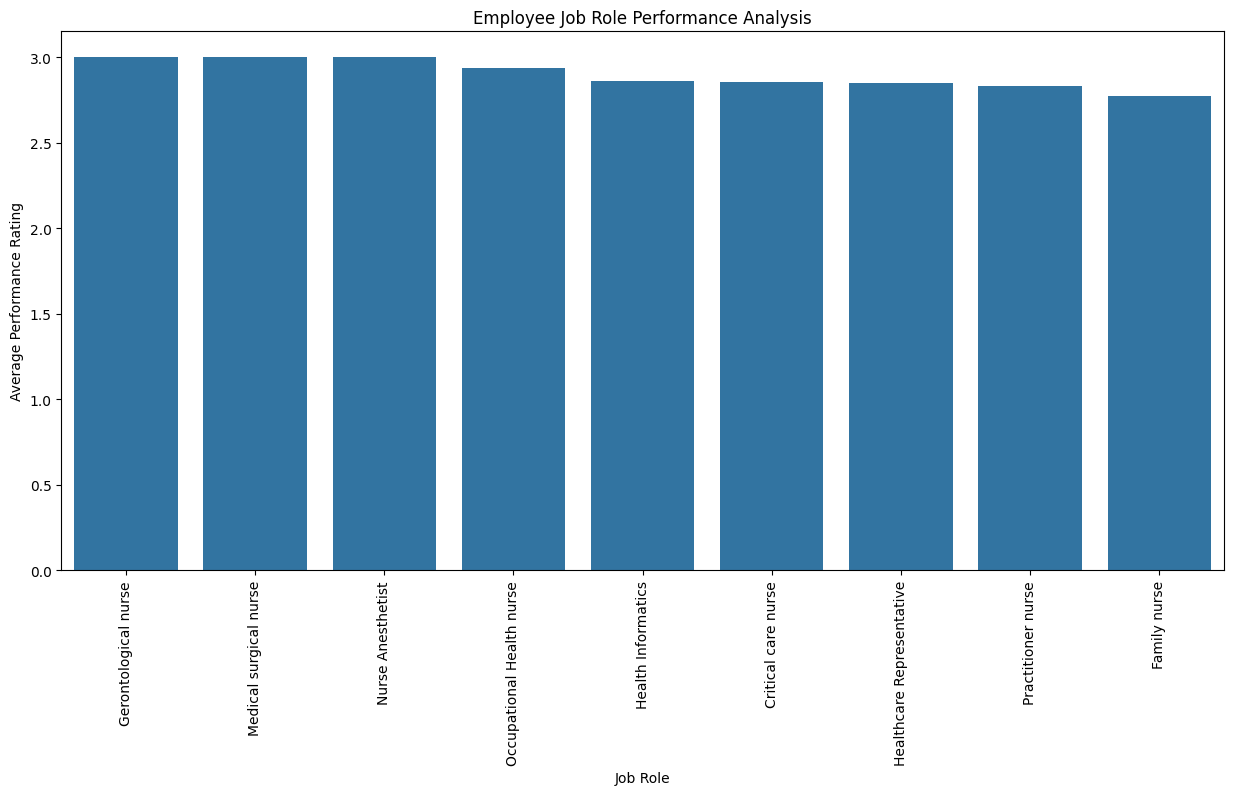

In [8]:
# Question 01
# Employee job role performance analysis
import matplotlib.pyplot as plt
import seaborn as sns

performance_by_role = df.groupby('EmpJobRole')['PerformanceRating'].mean().sort_values(ascending=False)
print("\nEmployee Job Role Performance Analysis:\n", performance_by_role)
# Plotting Employee Job Role Performance Analysis
plt.figure(figsize=(15, 7))
sns.barplot(x=performance_by_role.index, y=performance_by_role.values)
plt.title('Employee Job Role Performance Analysis')
plt.xlabel('Job Role')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=90)
plt.show()

We can observe a normal distribution here.

In [9]:
# Question 02
# Convert categorical data to numerical format using one-hot encoding
data = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = data.drop(columns=['PerformanceRating'])
y = data['PerformanceRating']

# Calculate Pearson correlation coefficients between each feature and the target variable
correlation_scores = X.apply(lambda feature: feature.corr(y))

# Create a DataFrame to store feature names and their correlation scores
feature_corr_df = pd.DataFrame({'Feature': correlation_scores.index, 'Correlation_Score': correlation_scores.values})

# Sort the DataFrame based on the absolute correlation scores in descending order
feature_corr_df['Abs_Correlation_Score'] = feature_corr_df['Correlation_Score'].abs()
feature_corr_df = feature_corr_df.sort_values(by='Abs_Correlation_Score', ascending=False)

# Print the most important features based on correlation scores
print("Most important features affecting performance:")
print(feature_corr_df.head(4))  # Change the number here to get more top features if needed

Most important features affecting performance:
                       Feature  Correlation_Score  Abs_Correlation_Score
2   EmpEnvironmentSatisfaction           0.466283               0.466283
6     EmpLastSalaryHikePercent           0.296237               0.296237
9           EmpWorkLifeBalance           0.163075               0.163075
11     YearsSinceLastPromotion          -0.162383               0.162383


The workload of staffs seams to also be are approximately equally distributed.

### Now it is time to define and train the ML model

#### Define the dependent variable (y) and the independent variable (x)

In our case the dependent variable would be the performance and all of the other variables would be independent. Now we can analyze the influence of the independent variables to the dependent one.

In [10]:
x = df.drop(columns=["EmpNumber", "PerformanceRating"])
y = df["PerformanceRating"]

In [11]:
# Perform label encoding for categorical features
categorical_features = ["Gender", "MaritalStatus", "EmpJobRole", "OverTime", "Attrition"]
for feature in categorical_features:
    le = LabelEncoder()
    x[feature] = le.fit_transform(x[feature])

In [12]:
x.head()

,Age,Gender,MaritalStatus,EmpJobRole,DistanceFromHomeKm,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,32,1,2,0,10,4,55,3,4,0,12,4,10,2,7,0,0
1,47,1,2,0,14,4,42,3,1,0,12,4,20,3,7,1,0
2,40,1,1,0,5,4,48,2,1,1,21,3,20,3,13,1,0
3,41,1,0,2,10,2,73,2,4,0,15,2,23,2,6,12,0
4,60,1,2,0,16,1,84,3,1,0,14,4,10,3,2,2,0


#### Split the dataset in training set and test set

Split the dataset into the training set and test set so that we can firstly train our model and then test how it works.
We set the test size to be 30% so training set would 70%.

To do that we would need the "train_test_split" function from sklearn.model_selection. So let's import the function and split the dataset.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#### Train the model on the training set

Now we train the model using the RandomForestClassifier function.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score

# Create and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Print feature importances
feature_importances = rf_model.feature_importances_
for feature, importance in zip(x.columns, feature_importances):
    print(f"{feature}: {importance}")

Model Accuracy: 0.9421052631578948
Age: 0.04819271630497428
Gender: 0.008900660150493065
MaritalStatus: 0.017911530391165706
EmpJobRole: 0.027551952631362647
DistanceFromHomeKm: 0.04371058348040223
EmpEnvironmentSatisfaction: 0.26993107039371794
EmpHourlyRate: 0.049651278935593825
EmpJobInvolvement: 0.018833109617245394
EmpJobSatisfaction: 0.02218655739547878
OverTime: 0.00880816057830182
EmpLastSalaryHikePercent: 0.17890586308742368
EmpRelationshipSatisfaction: 0.0200853552022402
TotalWorkExperienceInYears: 0.05080378638114359
EmpWorkLifeBalance: 0.04028865831012581
ExperienceYearsInCurrentRole: 0.061723910741446904
YearsSinceLastPromotion: 0.1230866331154477
Attrition: 0.009428173283436531


#### Test the model

To make sure that our model works and is capable of predicting values, we could predict the performance of an employee.
Let's take as an example the values from the first raw of our dataset and predict the performance of this employee using the trained model.

We can then compare the predicted value with the real value, to check how well the model is performing.

In [19]:
single_data_point = pd.DataFrame([[7, 4, 7, 6, 5, 5, 1, 7, 2, 10, 11, 12, 13, 14, 15, 16, 17]],
                                 columns=x_train.columns)

predicted_value = rf_model.predict(single_data_point)
actual_value = df.loc[0, 'PerformanceRating']

print("Predicted Value:", predicted_value[0])
print("Actual Value:", actual_value)

Predicted Value: 3
Actual Value: 3


We can see that the model predicted the performance of this employee based on all the attributes to be 3 whereas the actual value is 3. So we can conclude that the model does a pretty good job at predicting the performance of the employee.  

### Evaluate the model

To evaluate the model we use r2 score. The closer this score is to 1 the more precise our model is.
To calculate it we use r2_score function from sklearn.metrics

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8138747884940779

We see that r2 score is very high, close to 1 so our model is appropriate to predict the performance of employees.

#### Actual and Predicted values for the first 20 staff records

Let's now see the actual and the predicted values as well as the difference between them for the first 20 staff records.

In [17]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
213,3,3,0
502,2,2,0
623,3,3,0
157,3,3,0
626,4,4,0
103,2,2,0
172,3,3,0
490,3,3,0
467,3,3,0
230,3,3,0


We see that the model is pretty accurate as the differences are small.

### Print a summary of the model

Print a summary of the model using "statsmodels", and try to find out which of the independent attributes has the higher weight in performance prediction by looking at the coef. values.

In [18]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS               Adj. R-squared (uncentered): 0.976   
Dependent Variable:     PerformanceRating AIC:                         820.2282
Date:                   2024-12-20 19:27  BIC:                         895.8593
No. Observations:       632               Log-Likelihood:              -393.11 
Df Model:               17                F-statistic:                 1498.   
Df Residuals:           615               Prob (F-statistic):          0.00    
R-squared (uncentered): 0.976             Scale:                       0.20876 
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Age                              0.0084   0.0026  3.2343 0.0013  0.0033  0.0136
Gender                           0.0357   0.0378  0.9448 0.3452 

We can conclude that model works thanks to a high adjusted R-squared and all the attritutes.